In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import mplfinance as mpl


In [2]:
fnames=['ETH_USDT-15m.json']#os.listdir('data')
train_full=pd.DataFrame()
test_full=pd.DataFrame()

for fname in fnames:
    temp=pd.read_json('data/'+fname)
    split=int(0.9*len(temp))
    train_full=train_full.append(temp.iloc[:split,:])
    test_full=test_full.append(temp.iloc[split:,:])

train_np=train_full.drop(0,axis=1).to_numpy()
test_np=test_full.drop(0,axis=1).to_numpy()
print(train_np.shape)
#np.save('data/train_15meth.npy', train_np)
#np.save('data/test_15meth.npy', test_np)

train_full[0]=[pd.Timestamp.fromtimestamp(x/1000) for x in train_full[0]]
train_full.index=train_full[0]
train_full.drop(0, axis=1, inplace=True)
train_full.columns=['open','high','low','close','volume']

test_full[0]=[pd.Timestamp.fromtimestamp(x/1000) for x in test_full[0]]
test_full.index=test_full[0]
test_full.drop(0, axis=1, inplace=True)
test_full.columns=['open','high','low','close','volume']

/tmp/ipykernel_231/2082057868.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_full=train_full.append(temp.iloc[:split,:])
/tmp/ipykernel_231/2082057868.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_full=test_full.append(temp.iloc[split:,:])


(77688, 5)


In [14]:
temp[0]=[pd.Timestamp.fromtimestamp(x/1000) for x in temp[0]]
temp.index=temp[0]
temp.drop(0, axis=1, inplace=True)
temp.columns=['open','high','low','close','volume']

In [7]:
train_full.to_pickle('data/train_full.pkl')
test_full.to_pickle('data/test_full.pkl')

/home/tcastigl/crypto/RL_trading/RL_trading_env/lib/python3.8/site-packages/mplfinance/_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


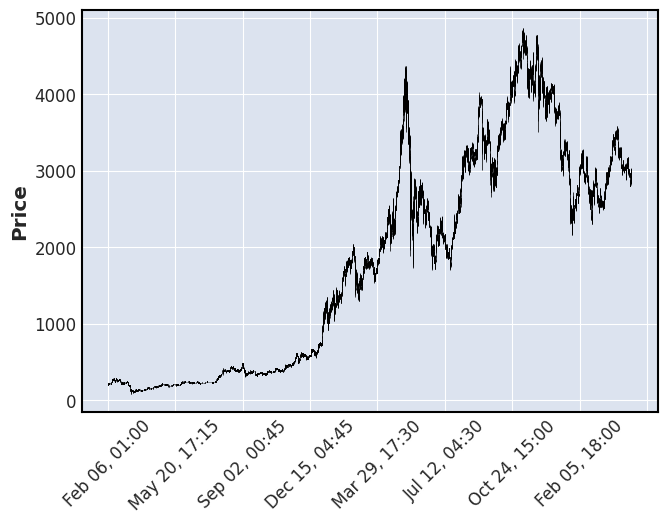

/home/tcastigl/crypto/RL_trading/RL_trading_env/lib/python3.8/site-packages/mplfinance/_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


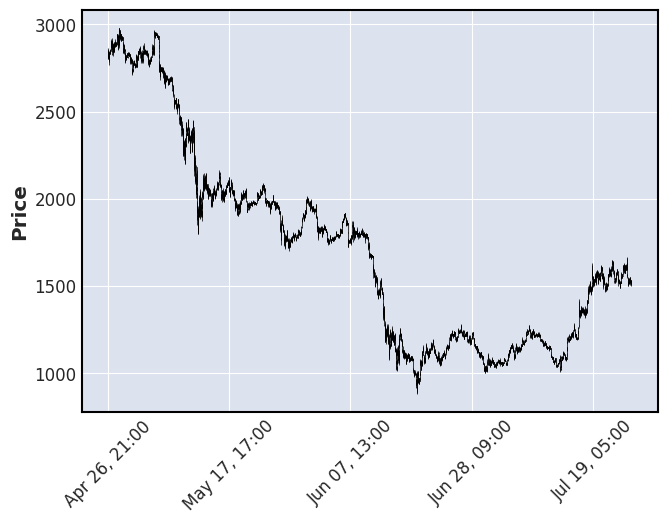

In [10]:
mpl.plot(train_full)
mpl.plot(test_full)